In [1]:
using Plots
using LaTeXStrings
using LinearAlgebra
using PrettyTables
using Printf
using DifferentialEquations

### 1. Problem Formulation
We consider the following two-dimensional linear ODE with $x = (x_1, x_2)$
$$
\left\{\begin{array}{l}
\dot{x}_1=x_1+x_2-2 \\
\dot{x}_2=x_1-x_2
\end{array}\right.
$$
where $\dot{x}$ represents the time derivative $\frac{d}{dt} x$. The computational domain $D$ is taken to be $D = [0, 2]^2$.

Note that the initial state is not giving, we can solve the system with some different initial states.

### 2. Method
We use the forward Euler to solve this problem.

#### 2.2 Implementation

In [7]:
function euler(ivp, n)
    # Time discretization
    a, b = ivp.tspan
    h = (b-a)/n
    t = [a + i*h for i in 0:n]

    # Initial condition and output setup.
    u = fill(float(ivp.u0), n+1)
    
    # The time stepping iteration.
    for i in 1:n
        u[i+1] = u[i] + h*ivp.f(u[i], ivp.p, t[i])
    end

    return t, u
end

euler (generic function with 1 method)

In [3]:
# ODE System
function linear_ode(u, p, t)
    x₁, x₂ = u
    return [x₁+x₂-2, x₁-x₂]
end


linear_ode (generic function with 1 method)

In [21]:
# setting the parameters of ivp
u₀ = [1.5, 0]
tspan = [0, 2]
ivp = ODEProblem(linear_ode, u₀, tspan)

ODEProblem with uType Vector{Float64} and tType Int64. In-place: false
timespan: (0, 2)
u0: 2-element Vector{Float64}:
 1.5
 0.0

In [22]:
# setting the parameters of imp_euler
n = 1000

t, u = euler(ivp, n);

In [23]:
u = [u[j] for u in u, j in [1,2]]

1001×2 Matrix{Float64}:
 1.5      0.0
 1.499    0.003
 1.498    0.005992
 1.49701  0.00897602
 1.49602  0.0119521
 1.49504  0.0149202
 1.49406  0.0178805
 1.49308  0.0208328
 1.49211  0.0237773
 1.49114  0.026714
 1.49018  0.0296429
 1.48922  0.0325639
 1.48826  0.0354772
 ⋮        
 2.22209  1.4329
 2.2254   1.43447
 2.22872  1.43606
 2.23205  1.43764
 2.23539  1.43923
 2.23874  1.44082
 2.2421   1.44242
 2.24546  1.44402
 2.24884  1.44562
 2.25223  1.44723
 2.25563  1.44884
 2.25904  1.45045

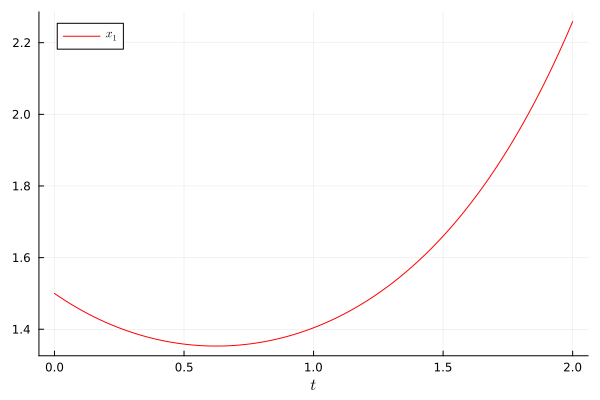

In [37]:
plot(t, u[:,1], l=(1,:red), xlabel=L"t", label=L"x_1")

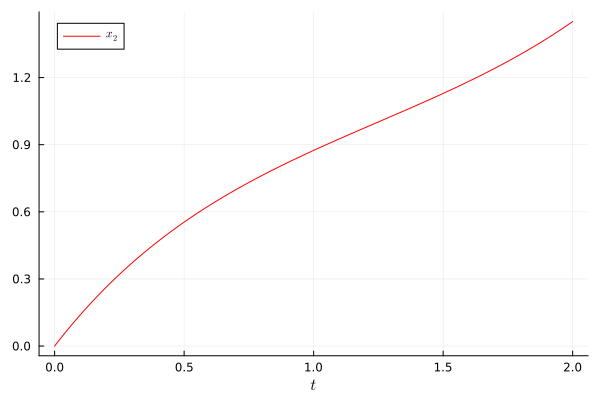

In [38]:
plot(t, u[:,2], l=(1,:red), xlabel=L"t", label=L"x_2")

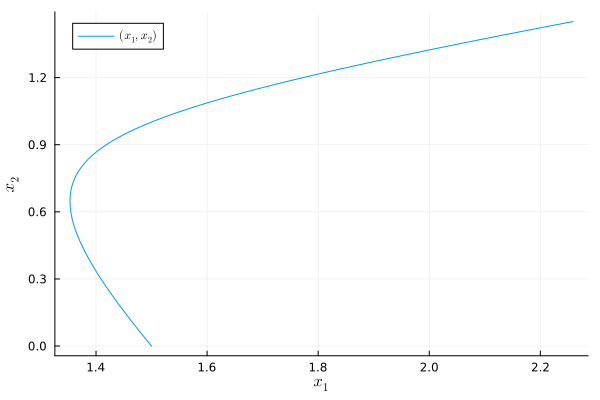

In [44]:
plot(u[:,1], u[:,2], xlabel=L"x_1", ylabel=L"x_2", label=L"(x_1,x_2)")